In [20]:
#Seq is string
import csv
from sklearn.model_selection import train_test_split

def seq_to_num(seq):
    Letters = ['A','R','N','D','Q','E','G','H','I','L','K','M','F','S','T','W','Y','V']
    num_list = [float(Letters.index(s)) for s in seq]
    return num_list
def seq_2_to_num(seq):
    num_list = []
    for i in range(6):
        if seq[i] in ('NTRP','CTRP', 'TRP'):
            num_list.append(0.0)
        if seq[i] in ('NHIE', 'CHIE', 'HIE'):
            num_list.append(1.0)
        if seq[i] in ('NMET', 'CMET', 'MET'):
            num_list.append(2.0)
        if seq[i] in ('NASN' , 'CASN', 'ASN'):
            num_list.append(3.0)
        if seq[i] in ('NALA', 'CALA', 'ALA'):
            num_list.append(4.0)
    return num_list
            

In [21]:

data = []
labels = []
with open('PET_SCORES.txt', 'r') as file:
    next(file)
    line_count = 0
    for line in file:
        if "Sequence" in line:
            continue
        line_count += 1 
        columns = line.split()
        
        short_sequence = columns[1]
        label = (float(columns[2])/35)+1
        labels.append(label)
        
        feature = seq_to_num(short_sequence)
        feature.append(label)
        data.append(feature)
print(min(labels))
print(line_count)
# Save the data to a CSV file
# with open('data.csv', 'w', newline='') as csvfile:
#     csv_writer = csv.writer(csvfile)
#     csv_writer.writerows(data)






-0.8225714285714285
441978


In [22]:
data = []
labels = []
for i in range(20):

    with open(f'ExhaustiveSampling_5AATypes_07Oct2023/structure{i+1}_data.txt', 'r') as file:
        next(file)
        line_count = 0
        for line in file:
            if "Sequence" in line:
                continue
            line_count += 1 
            columns = line.split()

            if len(columns) >= 7:
                if float(columns[6]) < 0.0:
                    short_sequence = [columns[i] for i in range(6)]
                    label = (float(columns[6])/13) + 1
                    labels.append(label)

                    feature = seq_2_to_num(short_sequence)
                    feature.append(label)
                    data.append(feature)
            else:
                continue
print(min(labels))
print(max(labels))
print(line_count)

with open('6AA_data_neg_norm.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(data)


-0.704076923076923
0.9994615384615385
4377


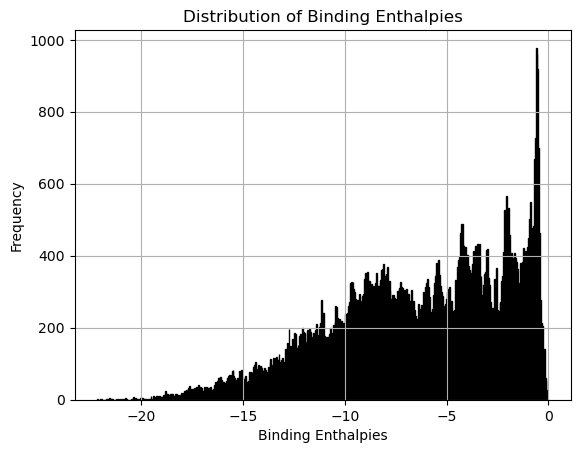

-0.007
95207


In [18]:
data = []
import numpy as np
import matplotlib.pyplot as plt

with open('6AA_data_neg.csv', 'r') as file:
    for line in file:
        columns = line.strip().split(',')
        if len(columns) >= 7:
            label = float(columns[-1])
            data.append(label)

# Create a histogram of the data
plt.hist(data, bins=500, color='blue', edgecolor='black')
plt.xlabel('Binding Enthalpies')
plt.ylabel('Frequency')
plt.title('Distribution of Binding Enthalpies')
plt.grid(True)

# Show the plot
plt.show()
print(max(data))
print(len(data))